In [1]:
#Black-hole binary formation channels with gaussian mixtures

#1. Load this file ( np.load ) and complete a quick exploration of the data. How many
#modes do you think you see?
#2. We'll use sklearn.mixture.GaussianMixture . You first need to define the
#model (instance of a class), and then train it on the data using the fit method (the
#data provided are already in the right numpy format!). This will output the trained
#model, which has various attributes.
#3. Complete the fit 10 times with N=1,....10 Gaussians.
#4. For each of this fits, compute the AIC (easy! It's an attribute of the trained model!).
#Plot N vs AIC: which model is preferred?
#Plot the preferred solution on top of the input data. You should get a very nice fit!



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
# Load data
def load_data(filepath):
    return np.load(filepath)

X = load_data('formationchannels.npy')

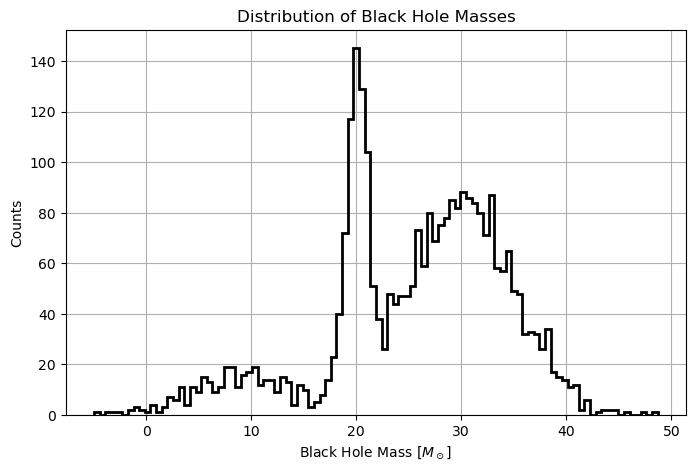

In [4]:
# Quick data exploration
def plot_histogram(X):
    plt.figure(figsize=(8, 5))
    plt.hist(X, bins=100, histtype='step', color='black', linewidth=2)
    plt.xlabel("Black Hole Mass $[M_\odot]$")
    plt.ylabel("Counts")
    plt.title("Distribution of Black Hole Masses")
    plt.grid(True)
    plt.show()

plot_histogram(X)

In [5]:
# Fit Gaussian Mixture Models for different number of components (3N-1 dof)
def fit_gmm_models(X, max_components=10):
    Ns = np.arange(1, max_components + 1)
    models = [GaussianMixture(n_components=N, random_state=42).fit(X) for N in Ns]
    return Ns, models

In [6]:
# Compute AIC for each model
def compute_aic(models, X):
    return [model.aic(X) for model in models]

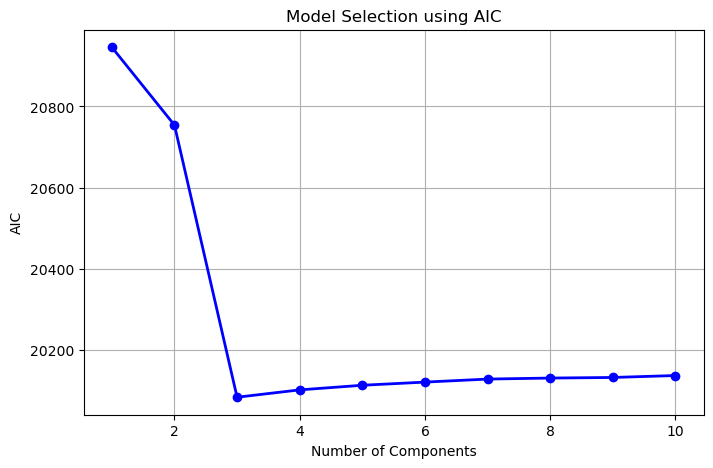

The AIC is minimized for N = 3


In [7]:
# Plot AIC vs number of components
def plot_aic(Ns, AIC):
    plt.figure(figsize=(8, 5))
    plt.plot(Ns, AIC, marker='o', color='blue', linewidth=2)
    plt.xlabel("Number of Components")
    plt.ylabel("AIC")
    plt.title("Model Selection using AIC")
    plt.grid(True)
    plt.show()

Ns, models = fit_gmm_models(X, max_components=10)
AIC = compute_aic(models, X)
plot_aic(Ns, AIC)
best_model = models[np.argmin(AIC)]
print(f'The AIC is minimized for N = {Ns[np.argmin(AIC)]}')

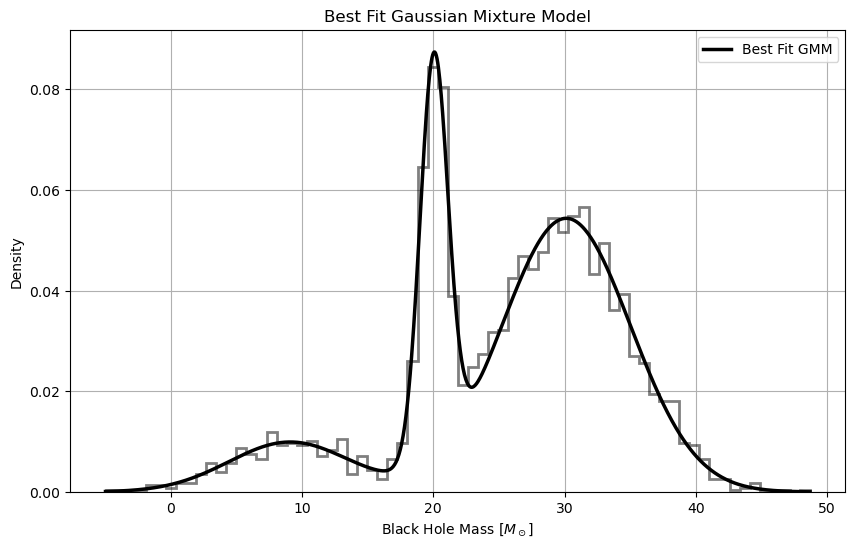

In [8]:
# Plot best fit model
def plot_best_fit(X, best_model):
    x = np.linspace(np.min(X), np.max(X), 1000)
    logprob = best_model.score_samples(x.reshape(-1, 1))
    pdf = np.exp(logprob)

    plt.figure(figsize=(10, 6))
    plt.hist(X, bins=70, density=True, histtype='step', color='black', alpha=0.5, linewidth=2)
    plt.plot(x, pdf, 'k-', label='Best Fit GMM', linewidth=2.5)
    plt.xlabel("Black Hole Mass $[M_\odot]$")
    plt.ylabel("Density")
    plt.title("Best Fit Gaussian Mixture Model")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_best_fit(X, best_model)

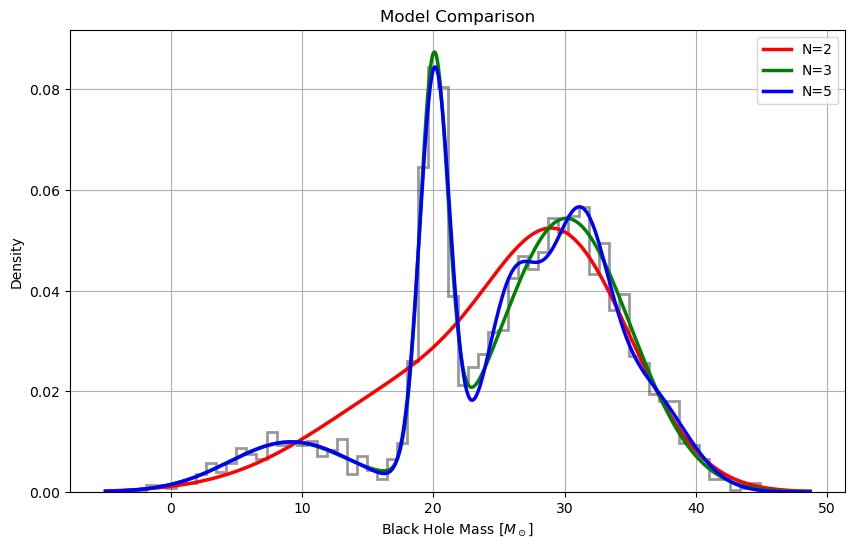

In [9]:
# Compare multiple models
def plot_model_comparison(X, models, Ns, AIC):
    x = np.linspace(np.min(X), np.max(X), 1000)
    plt.figure(figsize=(10, 6))
    plt.hist(X, bins=70, density=True, histtype='step', alpha=0.4, color='black', linewidth=2)

    colors = ['red', 'green', 'blue']
    for idx, offset in enumerate(np.array([-1, 0, 2])):
        index = np.argmin(AIC) + offset
        if 0 <= index < len(models):
            logprob = models[index].score_samples(x.reshape(-1, 1))
            plt.plot(x, np.exp(logprob), label=f'N={Ns[index]}', linewidth=2.5, color=colors[idx % len(colors)])

    plt.xlabel("Black Hole Mass $[M_\odot]$")
    plt.ylabel("Density")
    plt.title("Model Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model_comparison(X, models, Ns, AIC)